# Decision Tree
___

Un arbol de decisión es una función que toma un vector o dataset como parámetro de entrada y genera un resultado llamado decisión, esta decisión puede ser un valor discreto o continuo. Para ello se genera una estructura de nodos que poseen su propio predicado y el objetivo es recorrer estos nodos evaluando cada criterio hasta llegar a una hoja que alberga la predicción.

### Nodos del árbol

Existen dos tipos de nodos en un árbol de decisión, ramas y hojas, las ramas contienen los predicados o "preguntas" que permiten tomar una decisión al algoritmo, por otra parte, las hojas contienen la decisión a la que se llega mediante los predicados en las ramas del árbol.

### Selección de predicados

La selección de un predicado en un nivel del árbol determina que tanto se disminuirá la incertidumbre de los datos en el siguiente nivel para así poder llegar una decisión lo más acertada posible, es por esto que elegir el mejor predicado para dividir el árbol es la tarea más importante. A continuación un ejemplo para ilustrar la escogencia de atributos:



### Imports

In [1]:
import math
import graphviz
import csv

### Dataset
El siguiente dataset consta de un registro de desiciones sobre si realizar o no una evaluación tomando en cuenta factores como el tipo de evaluación, el curso al que corresponde, el interés del estudiante sobre la evaluación, tiempo disponible y el conocimiento sobre el tema de la evaluación. La columna "Clasificador" corresponde a la decisión final sobre si hacer o no la evaluación.

In [2]:
columnas = ['Tipo', 'Curso', 'Interes', 'Tiempo Disponible', 'Conocimiento','Clasificador']
dataset = [
        ["Proyecto corto", 'IA', 'Medio', 'Alto', 'Medio','Si'],
        ["Examen", 'IA', 'Alto', 'Alto', 'Bajo','Si'],
        ["Tarea", 'Seminario','Medio', 'Bajo', 'Alto','No'],
        ["Proyecto", 'AP', 'Bajo', 'Medio', 'Alto','Si'],
        ["Tarea", 'Seminario', 'Alto', 'Alto', 'Medio','Si'],
        ["Proyecto corto", 'AP', 'Medio', 'Medio', 'Bajo','No'],
        ["Examen", 'Seminario', 'Bajo', 'Medio', 'Alto', 'No'],
        ["Proyecto", 'AP', 'Bajo', 'Alto', 'Bajo','Si'],
        ["Proyecto", 'Redes', 'Medio', 'Medio', 'Medio', 'No'],
        ["Examen", 'Seminario', 'Bajo', 'Bajo', 'Medio', 'Si'],
        ["Proyecto corto", 'IA', 'Bajo', 'Alto', 'Bajo', 'Si'],
        ["Examen", 'Seminario', 'Alto', 'Medio', 'Alto', 'No'],
        ["Tarea", 'AP', 'Medio', 'Bajo', 'Bajo','No'],
        ["Proyecto", 'IA', 'Medio', 'Medio', 'Medio', 'Si'],
        ["Tarea", 'Redes', 'Alto', 'Medio', 'Medio','No'],
        ["Examen", 'Redes', 'Alto', 'Bajo', 'Alto', 'Si'],
        ["Proyecto", 'Seminario', 'Alto', 'Bajo', 'Alto', 'Si'],
        ["Proyecto", 'IA', 'Bajo', 'Medio', 'Medio','Si'],
        ["Tarea", 'AP', 'Medio', 'Medio', 'Bajo','Si'],
        ["Tarea", 'IA', 'Medio', 'Medio', 'Bajo','Si'],
        ["Examen", 'Seminario', 'Bajo', 'Medio', 'Bajo','No'],
]

In [3]:
print_var = True #variable para habilitar los prints
def contador_goal(filas):
    """Recibe el dataset restante y devuelve un diccionario con la 
    cantidad de veces que aparece cada valor en la columna, es
    usado para calcular la probabilidad de cada atributo.
    @param filas: Corresponde a un arreglo de arreglos con el dataset restante
    @return contador: diccionario con la cantidad de veces que aparece un valor por columna
    """
    contador = {}
    for fila in filas:
        tag = fila[-1]
        if tag not in contador:
            contador[tag] = 0
        contador[tag] += 1
    return contador

def pluralidad(diccionario):
    """ Ante predicciones compuestas en hojas
    se elige el de mayor probabilidad
    @param: diccionario: corresponde a un diccionario con la predicción de una hoja
                        y la cantidad de veces que aparece e.g: {'Si': 4, 'No': 2}
    @return: mayor: retorna en forma de diccionario el elemento con mayor
                    ocurrencia, en el ejemplo anterior sería la key 'Si'
    """
    mayor = {'Yes':0}
    for atributo in diccionario:
        if (diccionario[atributo]>=mayor[list(mayor)[0]]):
            mayor = {atributo : diccionario[atributo]}
    return mayor

def particion(filas, criterio):
    """Función encargada de partir el dataset dependiendo del criterio
    @param: filas: Corresponde a un arreglo de arreglos con el dataset restante
            criterio: Objeto de tipo Criterio con el cual se evalua cada valor
    @return: yes_filas: arreglo que contiene las filas que cumplen el criterio
            no_filas: arreglo que contiene las filas que no cumplen el criterio
    """
    yes_filas, no_filas = [], []
    for fila in filas:
        if criterio.match(fila):
            yes_filas.append(fila)
        else:
            no_filas.append(fila)
    return yes_filas, no_filas


In [4]:
class Nodo:
    """Nodo de decision
    contiene las dos ramas y el criterio de división
    """
    def __init__(self,criterio,
                 yes_rama,
                 no_rama,
                 ganancia):
        self.criterio = criterio
        self.ganancia = round(ganancia, 4)
        self.yes_rama = yes_rama
        self.no_rama = no_rama
        
class Hoja:
    """ Clase que contiene la predicción,
    es el último nivel de las ramas.
    """
    def __init__(self, filas):
         self.prediccion = pluralidad(contador_goal(filas))
            
class Criterio:
    """Clase que alberga un criterio de división por el cual se puede
    partir el dataset.
    """
    def __init__(self, columna, valor):
        self.columna = columna
        self.valor = valor

    def match(self, ejemplo):
        """ Función encargada de evaluar el criterio con respecto a una fila
        @param: ejemplo: fila a la cual se le desea aplicar la comparación
        @return: retorna un booleano dependiendo si la fila encaja con el criterio
        """
        val = ejemplo[self.columna]
        if isinstance(val, int) or isinstance(val, float): #Si es un valor numérico, su comparación es >=
            return val >= self.valor
        else:
            return val == self.valor

    def __repr__(self):
        condition = "=="
        if isinstance(self.valor, int) or isinstance(self.valor, float):
            condition = ">="
        return "%s %s %s" % (
            columnas[self.columna], condition, str(self.valor))


### Entropia de Shannon
La entropia de un sistema se refiere a la medida de incertidumbre. Un sistema totalmente parcial no posee incertidumbre probabilistica, por lo cual su entropía es cero. Mientras tanto, un sistema con igual probabilidad en cada uno de sus posibilidades es un sistema inparcial cuya entropía corresponde a uno. La fórmula usada para calcular la entropía de la variable V  con d cantidad distinto de valores es la siguiente:

$$ - \sum_{k = 1}^{d} P(v_{k}) log_{2} P(v_{k}) $$

In [5]:
def entropia(filas):
    """Función encargada de calcular la entropía.
    @param: filas: Corresponde a un arreglo de arreglos con el dataset restante
    @entropia: flotante que representa la entropía con respecto al dataset otorgado.
    """
    contador = contador_goal(filas)
    entropia = 0
    for tag in contador:
        probabilidad = contador[tag] / float(len(filas))
        entropia += probabilidad * math.log2(probabilidad) # sumatoria de la probabilidad de cada atributo por su log2
    return entropia * -1

### Ganancia
La ganancia se refiere a la cantidad de entropia resultante de un sistema luego de que el conjunto de datos haya sido dividido a base de un atributo en específico. Su fórmula esta dada por la entropía menos el residuo que otorga la selección del atributo. El residuo es calculado de la siguiente manera:

$$ Residuo(A) = \sum_{k=1}^{d} \frac{p_{k} + n_{k}}{p+n} * Entropia( \frac {p_{k}}{p_{k}+n_{k}} ) $$

In [6]:
def ganancia(izq, der, incertidumbre):
    """Función encargada de calcular la ganancia.
    @param: izq:  arreglo de filas donde se encuentra un valor específico en una columna específica
            der: arreglo de filas donde NO se encuentra un valor específico en una columna específica
            incertidumbre: flotante con la incertidumbre del sistema en un punto en específico.
    @return: ganancia_total: flotante con la ganancia del atributo.
            string_print: String que contiene la información generada en la función para efectos ilustrativos
    """
    p = float(len(izq)) / (len(izq) + len(der)) #probabilidad
    residuo = p * entropia(izq) + (1 - p) * entropia(der)
    ganancia_total = incertidumbre - residuo
    string_print = ": " + str(round(incertidumbre, 4)) + " - "+ str(round(residuo, 4)) + " = " +  str(round(ganancia_total, 4)) + "\n"
    return ganancia_total, string_print

In [7]:
def mejor_atributo(filas):
    """ Función encargada de calcular toda la ganacia de atributos y escoger
        el que mayor ganancia otorga.
    @param: filas: Corresponde a un arreglo de arreglos con el dataset restante
    @return: mejor_ganancia: flotante con la mayor ganancia de todas las evaluadas.
            mejor_criterio: objeto de tipo criterio con el atributo que obtuvo la mejor ganancia.
    """
    mejor_ganancia = 0 
    mejor_criterio = None 
    incertidumbre = entropia(filas)
    cant_atributos = len(filas[0]) - 1 #cantidad de columnas, exceptuando la clasificadora
    string_print = ""  #string para concatenar los print del cálculo de entropía.
    
    for col in range(cant_atributos):
        string_print += str(columnas[col]) + "\n"
        valores = set([row[col] for row in filas]) #conjunto de valores de la columna.
        for val in valores: 

            string_print += "   " + str(val)
            criterio = Criterio(col, val)
            yes_filas, no_filas = particion(filas, criterio)
            
            #Si alguno de los atributos es totalmente parcial, no secalcula la ganancia
            if len(yes_filas) == 0 or len(no_filas) == 0:
                string_print += ": Totalmente parcial (probabilidad del 100% en la columna) \n"
                continue
                
            ganancia_atributo, string_return = ganancia(yes_filas, no_filas, incertidumbre)
            string_print += string_return
            
            if ganancia_atributo >= mejor_ganancia:
                mejor_ganancia, mejor_criterio = ganancia_atributo, criterio
                
    if mejor_ganancia != 0 and print_var:
        string_print += "Mejor ganancia: " + str(round(mejor_ganancia,4)) + " criterio: " + columnas[mejor_criterio.columna] 
        print(string_print)
        print("--------------------------------------------------------------")
    return mejor_ganancia, mejor_criterio

In [8]:
def contruccion_arbol(filas):
    """Función recursiva encargada de la creación del arbol
    se hace dos llamadas recursivas por nodo, las cuales corresponden a las ramas.
    @param: filas: Corresponde a un arreglo de arreglos con el dataset restante
    @return: Objeto de tipo Nodo u Hoja dependiendo del nivel del árbol.
    """

    ganancia, criterio = mejor_atributo(filas)

    #Si la ganancia es cero
    #se crea una hoja
    if ganancia == 0:
        return Hoja(filas)

    yes_filas, no_filas = particion(filas, criterio)
    yes_branch = contruccion_arbol(yes_filas)
    no_branch = contruccion_arbol(no_filas)
    return Nodo(criterio, yes_branch, no_branch, ganancia)

In [9]:
G = graphviz.Digraph()
node_id=0
def imprimir_arbol(node): 
    """ Función de mostrar el árbol gráficamente
    """
    global node_id
    if isinstance(node, Hoja):
        hoja = str(node_id)
        G.node(hoja, label = str(node.prediccion), style="rounded, filled", shape="box", fillcolor="lightgreen")
        node_id += 1
        return hoja

    rama = str(node_id)
    G.node(rama, label = str(node.criterio) + "\n ganancia:" + str(node.ganancia), style="rounded, filled", shape="box")
    node_id += 1

    G.edge(rama, imprimir_arbol(node.yes_rama), label = "true")

    G.edge(rama, imprimir_arbol(node.no_rama), label = "false")

    return rama


### Resultados
A continuación se mostrarán los resultados de la construcción del árbol de decisión. La primera parte corresponde a salidas escritas que muestran los cálculos con los cuales se eligió el mejor criterio para partir el árbol. Estas salidas se deben interpretar como el cálculo de la ganancia por cada valor posible en las columnas del dataset a ese punto del árbol, al final de cada iteración se especifica el mejor criterio para partir el árbol. 

La segunda parte de resultados, corresponde a un ejemplo gráfico del árbol. Los instancias grises son nodos que indican su criterio de partición y ganancia, por otra parte, las instancias verdes se refieren a las hojas del árbol con su resultado de predicción y la cantidad de filas que respaldan esta decisión.

In [10]:
arbol_decision = contruccion_arbol(dataset)

Tipo
   Examen: 0.9587 - 0.9416 = 0.0171
   Tarea: 0.9587 - 0.9416 = 0.0171
   Proyecto: 0.9587 - 0.8977 = 0.061
   Proyecto corto: 0.9587 - 0.9575 = 0.0012
Curso
   Seminario: 0.9587 - 0.9038 = 0.0549
   IA: 0.9587 - 0.712 = 0.2467
   AP: 0.9587 - 0.9584 = 0.0003
   Redes: 0.9587 - 0.9183 = 0.0404
Interes
   Medio: 0.9587 - 0.9322 = 0.0265
   Alto: 0.9587 - 0.9559 = 0.0028
   Bajo: 0.9587 - 0.9445 = 0.0142
Tiempo Disponible
   Medio: 0.9587 - 0.8645 = 0.0943
   Alto: 0.9587 - 0.7619 = 0.1968
   Bajo: 0.9587 - 0.9584 = 0.0003
Conocimiento
   Medio: 0.9587 - 0.9445 = 0.0142
   Alto: 0.9587 - 0.9416 = 0.0171
   Bajo: 0.9587 - 0.9586 = 0.0001
Mejor ganancia: 0.2467 criterio: Curso
--------------------------------------------------------------
Tipo
   Examen: 0.9968 - 0.9903 = 0.0065
   Tarea: 0.9968 - 0.9903 = 0.0065
   Proyecto corto: 0.9968 - 0.9333 = 0.0635
   Proyecto: 0.9968 - 0.9098 = 0.087
Curso
   Seminario: 0.9968 - 0.9931 = 0.0037
   AP: 0.9968 - 0.971 = 0.0258
   Redes: 0.9968 

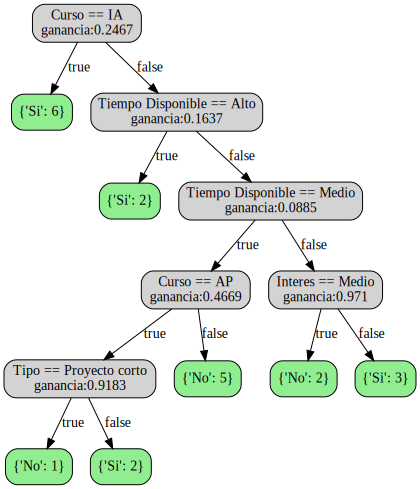

In [11]:
G = graphviz.Digraph()
imprimir_arbol(arbol_decision)
G

# Random Forest
___

Random Forest es una función que toma un vector o dataset como parámetro de entrada y genera un resultado llamado decisión, esta decisión puede ser un valor discreto o continuo. Este algoritmo construye $n$ árboles de decisión, cada uno de los árboles recibe una muestra de tamaño $m$ del dataset elegida de manera aleatoria y son construidos basado en sus correspondientes muestras. Una vez creados los árboles, una decisión es tomada enviando el vector de entrada a cada uno de los árboles para que tomen decisiones individualmente, una vez que todos los árboles han tomado la decisión, el algoritmo cuenta las decisiones tomadas por los árboles, tomando la que tuvo la mayor ocurrencia como la decisión final, en otras palabras, se realiza una votación en donde cada árbol es un votante y gana la decisión que obtuvo la mayor cantidad de votos.

#### Ventajas

* Es un clasificador muy preciso para muchos tipos de dataset.
* Facilmente paralelizable, por lo que en grandes datasets corre eficientemente.
* Disminuye el over fitting al utilizar multiples árboles de decisión en lugar de uno.

#### Desventajas

* Over fitting al usar datasets que describen tareas ruidosas, por ejemplo, clasificación imágenes.


### Ejemplo
El siguiente ejemplo tiene como base un dataset de seguros medicos en Estados Unidos con las siguientes columnas: Género, BMI, Cantidad de Hijos, Fumador, Región, Edad. El dataset esta almacenado en el archivo dataset.csv y contiene 166 filas. Se partirá el dataset en subconjuntos de 56 filas para crear tres arboles. La predicción consiste en el coste estimado de seguro de una persona con tales características.

In [12]:
print_var = False #Para que no se muestren los prints de los cálculos

"""Función que se encarga de leer el archivo dataset.csv
y pasarlo en formato de lista de python
"""
with open('dataset.csv', 'r') as f:
  reader = csv.reader(f)
  dataset_seguros = list(reader)
    
"""División del dataset en grupos de 56 filas
y creación de 3 arboles
"""
subdataset = [dataset_seguros[x:x+56] for x in range(0, len(dataset_seguros), 56)]
arbol0 = contruccion_arbol(subdataset[0])
arbol1 = contruccion_arbol(subdataset[1])
arbol2 = contruccion_arbol(subdataset[2])

def resultado(fila, nodo):
    """Función que evalua un predicado en un arbol
    """
    if isinstance(nodo, Hoja):
        return next(iter(nodo.prediccion))
    if nodo.criterio.match(fila):
        return resultado(fila, nodo.yes_rama)
    else:
        return resultado(fila, nodo.no_rama)

    
def random_forest(ejemplo):
    print("La predicción del ejemplo "+str(ejemplo))
    print("Arbol 0 = " + str(resultado(ejemplo,arbol0)))
    print("Arbol 1 = " + str(resultado(ejemplo,arbol1)))
    print("Arbol 2 = " + str(resultado(ejemplo,arbol2)))

#                Género, BMI, Hijos, Fumador, Región, Edad
random_forest(['female','Normal','3','no','southwest','50']) #Resultado real: 10 000
random_forest(['male','Morbido','1','yes','northwest','40']) #Resultado real: 40 000
random_forest(['male','Sobrepeso','0','no','northwest','20']) #Resultado real: 1 000



La predicción del ejemplo ['female', 'Normal', '3', 'no', 'southwest', '50']
Arbol 0 = 10000
Arbol 1 = 10000
Arbol 2 = 10000
La predicción del ejemplo ['male', 'Morbido', '1', 'yes', 'northwest', '40']
Arbol 0 = 40000
Arbol 1 = 40000
Arbol 2 = 25000
La predicción del ejemplo ['male', 'Sobrepeso', '0', 'no', 'northwest', '20']
Arbol 0 = 5000
Arbol 1 = 1000
Arbol 2 = 1000


# Referencias

* Russel, S., Norvig P.(2010). _Artificial Intelligence - A Modern Approach_ (3ra. ed.). Pearson Education, Inc.

* Gordon, J. _Decision tree tutorial_. 10 de septiembre de 2018. Recuperado de https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

* Choi, M., _Medical Cost Personal Datasets_. 9 de septiembre de 2018. Recuperado de https://www.kaggle.com/mirichoi0218/insurance